In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('D:/ME/ME_2nd_Sem/Pyspark_project/final.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632619 entries, 0 to 632618
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   price                                632619 non-null  float64
 1   distance                             632619 non-null  float64
 2   surge_multiplier                     632619 non-null  float64
 3   source_Back Bay                      632619 non-null  float64
 4   source_Beacon Hill                   632619 non-null  float64
 5   source_Boston University             632619 non-null  float64
 6   source_Fenway                        632619 non-null  float64
 7   source_Financial District            632619 non-null  float64
 8   source_Haymarket Square              632619 non-null  float64
 9   source_North End                     632619 non-null  float64
 10  source_North Station                 632619 non-null  float64
 11  source_Northe

In [5]:
data.head()

,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [8]:
import pandas as pd


# Load the dataset

# Split the data into training and testing sets
X = data.drop('price', axis=1)  # Input features
y = data['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
r2_lr = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R2):", r2_lr)

Mean Squared Error (MSE): 5.010893674061638
Root Mean Squared Error (RMSE): 2.2385025517210466
R-squared (R2): 0.935160947028492


In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_model =DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_dtr = mean_squared_error(y_test, y_pred_tree)
rmse_dtr = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_dtr = r2_score(y_test, y_pred_tree)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_dtr)
print("Root Mean Squared Error (RMSE):", rmse_dtr)
print("R-squared (R2):", r2_dtr)

Mean Squared Error (MSE): 2.4032848949254495
Root Mean Squared Error (RMSE): 1.5502531712354113
R-squared (R2): 0.9689024100801985


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred_rf  = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)

Mean Squared Error (MSE): 2.3532153803316644
Root Mean Squared Error (RMSE): 1.5340193546144274
R-squared (R2): 0.9695502905023693


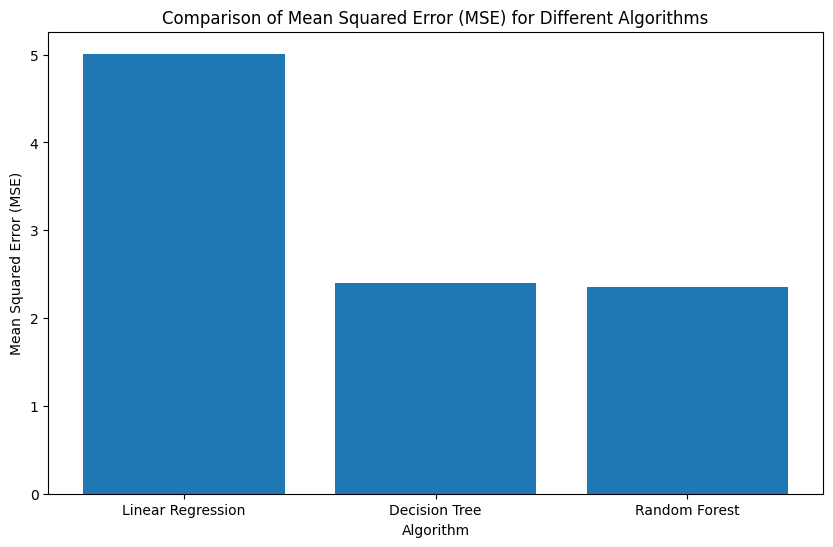

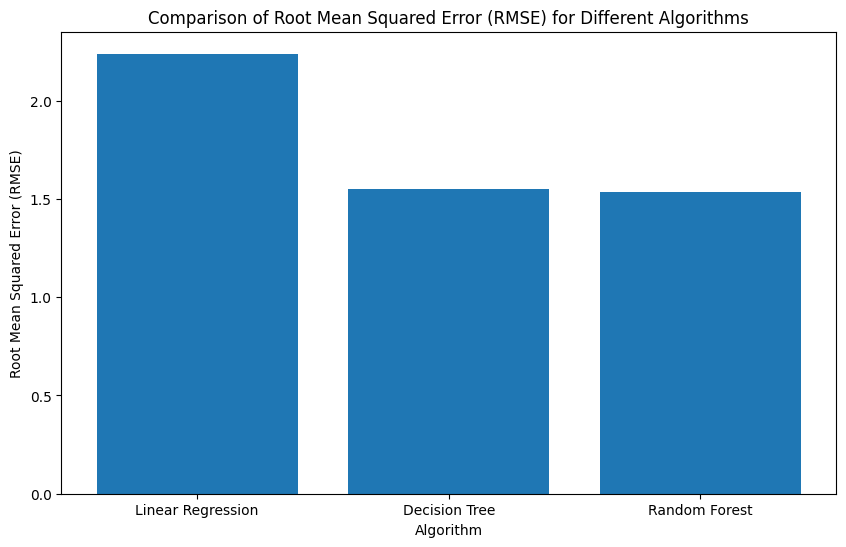

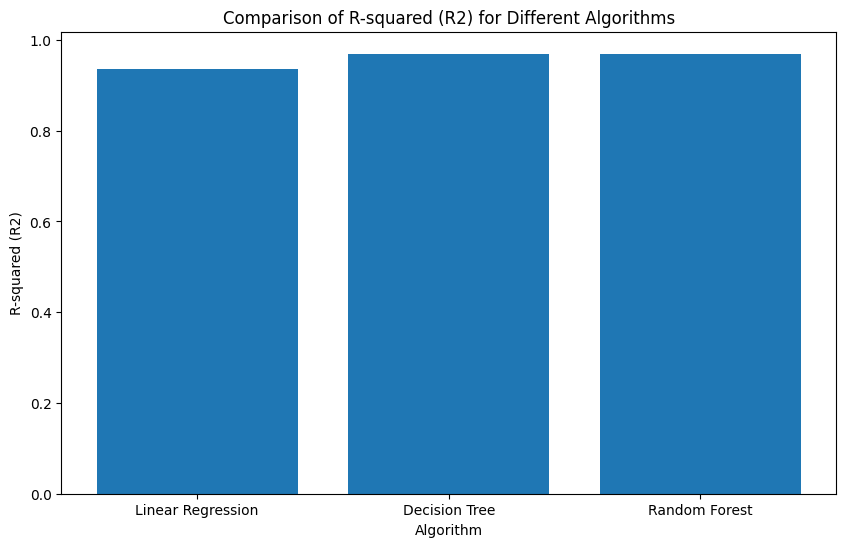

In [11]:
import matplotlib.pyplot as plt

# Define the evaluation metrics for each algorithm
mse_values = [mse_lr, mse_dtr, mse_rf]
rmse_values = [rmse_lr, rmse_dtr, rmse_rf]
r2_values = [r2_lr, r2_dtr, r2_rf]

# Define the labels for each algorithm
labels = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.bar(labels, mse_values)
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Algorithms')
plt.show()

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.bar(labels, rmse_values)
plt.xlabel('Algorithm')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Root Mean Squared Error (RMSE) for Different Algorithms')
plt.show()

# Plot the R2 values
plt.figure(figsize=(10, 6))
plt.bar(labels, r2_values)
plt.xlabel('Algorithm')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) for Different Algorithms')
plt.show()
